* **Company:** Alber Blanc
* **Author:** Hakob Petrosyan
* **Phone:** +79309878934
* **Adress:** MIPT, Moscow
* **Contacts:** akob.petrosyan@phystech.edu, [vk.com/jacpetro](vk.com/jacpetro), [https://t.me/jacpetro](https://t.me/jacpetro).

![](AlberBlanc.jpg)

In [15]:
!pip install scipy seaborn

  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [1]:
# Standard modules
import os
import glob
import time
from random import randint
import itertools
from queue import Queue
from threading import Thread

# Third-party modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import invgamma, chisquare, mannwhitneyu, kstest
from scipy.stats import f
from fitter import Fitter, get_distributions, get_common_distributions
sns.set()

In [14]:
paths = glob.glob(os.path.join(os.getcwd(), "data", "MWMT", "*.pkl"))

dfs = [pd.read_pickle(path) for path in paths]
dfs[0].head()

,update_id,client_timestamps,delay
0,2851524536602,1.684277e+12,13709.0
1,2851524536764,1.684277e+12,13701.0
2,2851524536928,1.684277e+12,13691.0
3,2851524537080,1.684277e+12,13682.0
4,2851524537382,1.684277e+12,13665.0


In [15]:
df_info = {"conn": [0, 1, 2, 3, 4], "mean": [], "std": [], "max": [], "min": []}
for i, df in enumerate(dfs):
    df_info["mean"].append(df.delay.describe().loc[["mean"]].values[0])
    df_info["std"].append(df.delay.describe().loc[["std"]].values[0])
    df_info["max"].append(df.delay.describe().loc[["max"]].values[0])
    df_info["min"].append(df.delay.describe().loc[["min"]].values[0])
    print("Dataframe shape: ", df.shape)

df_info = pd.DataFrame.from_dict(df_info)
df_info.set_index(["conn"], inplace=True)
df_info

Dataframe shape:  (6284, 3)
Dataframe shape:  (6284, 3)
Dataframe shape:  (6284, 3)
Dataframe shape:  (6284, 3)
Dataframe shape:  (6284, 3)


,mean,std,max,min
conn,,,,
0,2590.244112,1919.065041,13709.0,2068.0
1,2588.836569,1919.457418,13709.0,2068.0
2,2588.079090,1919.756512,13709.0,2067.0
3,2588.073520,1919.421653,13708.0,2067.0
4,2588.351528,1919.423148,13708.0,2068.0


## Распределения задержек по соединениям

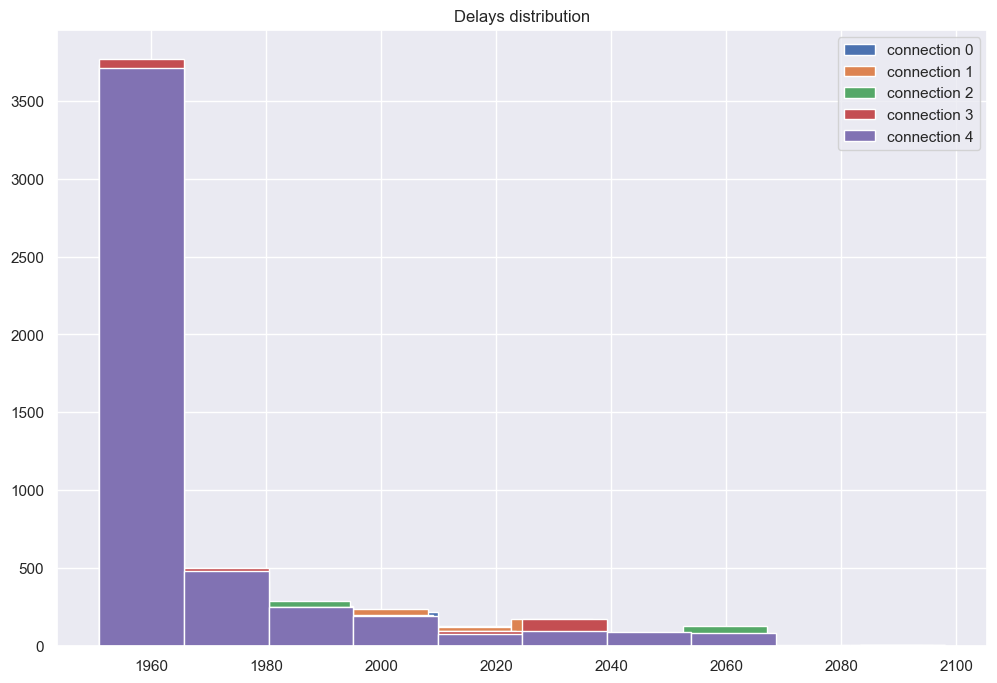

In [10]:
fig = plt.figure(figsize=(12, 8))

for i, df in enumerate(dfs):
    plt.hist(df.delay, bins=10, label=f"connection {i}")
    plt.title("Delays distribution")
    plt.legend()

## Cumulative Distribution

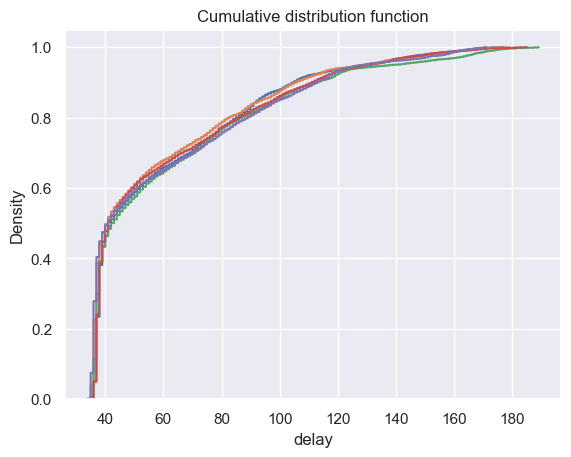

In [41]:
for i, df in enumerate(dfs):
    sns.histplot(data=df.delay, bins=len(df), stat="density", element="step", fill=False, cumulative=True, common_norm=False, legend=f"Connection {i}")
    plt.title("Cumulative distribution function")

Думаю, что наибольший импакт на полученные результаты имеет GIL и в контексте многопоточности питона не совсем правильно искать причины вне этого контекста. В качестве доказательства давайте посмотрим на те же самые графики в случае когда у нас 200 потоков, тогда в пуле ожиданий всегда будут потоки, которые будут очень долго ждать своей очереди. Это обяснит появление очень резкого и тоного хвоста в распределении задержек.

In [71]:
many_paths = glob.glob(os.path.join(os.getcwd(), "data", "MWMT", "many", "*.pkl"))

many_dfs = [pd.read_pickle(path) for path in many_paths]
many_dfs[0].head()

,update_id,client_timestamp,delay
0,2828518269736,1.683711e+12,6851.0
1,2828518272197,1.683711e+12,6789.0
2,2828518272249,1.683711e+12,6788.0
3,2828518272442,1.683711e+12,6845.0
4,2828518273062,1.683711e+12,6903.0


In [100]:
for df in many_dfs:
    print(df.shape)

(1155, 2)
(808, 2)
(1289, 2)
(1472, 2)
(1613, 2)
(1313, 2)
(1587, 2)
(1284, 2)
(1303, 2)
(1914, 2)
(1737, 2)
(1720, 2)
(1694, 2)
(999, 2)
(1682, 2)
(1268, 2)
(1258, 2)
(1288, 2)
(1255, 2)
(1377, 2)
(1600, 2)
(1927, 2)
(1803, 2)
(1339, 2)
(1032, 2)
(1521, 2)
(1704, 2)
(1450, 2)
(1442, 2)
(1569, 2)
(1403, 2)
(1352, 2)
(1827, 2)
(2002, 2)
(1774, 2)
(1231, 2)
(1315, 2)
(1378, 2)
(1733, 2)
(1369, 2)
(1272, 2)
(1382, 2)
(2088, 2)
(1596, 2)
(1930, 2)
(1896, 2)
(1244, 2)
(2042, 2)
(1327, 2)
(1637, 2)
(1740, 2)
(1391, 2)
(1354, 2)
(1611, 2)
(1467, 2)
(1320, 2)
(1912, 2)
(882, 2)
(1840, 2)
(1443, 2)
(1720, 2)
(1479, 2)
(1962, 2)
(1908, 2)
(1581, 2)
(1623, 2)
(1534, 2)
(2046, 2)
(1383, 2)
(2071, 2)
(1989, 2)
(1959, 2)
(1908, 2)
(1514, 2)
(1841, 2)
(2134, 2)
(2017, 2)
(1532, 2)
(1336, 2)
(1640, 2)
(1909, 2)
(1904, 2)
(1533, 2)
(1559, 2)
(2010, 2)
(1943, 2)
(2105, 2)
(2151, 2)
(1820, 2)
(2241, 2)
(1463, 2)
(1692, 2)
(1980, 2)
(1934, 2)
(1644, 2)
(1860, 2)
(1926, 2)
(1884, 2)
(1516, 2)
(2064, 2)
(16

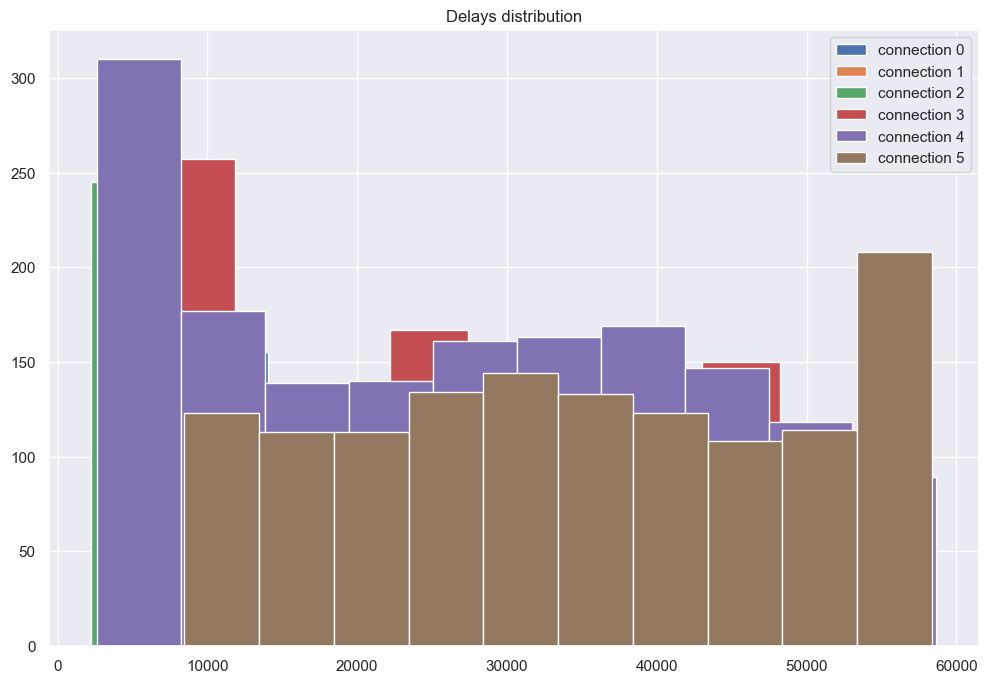

In [74]:
fig = plt.figure(figsize=(12, 8))

for i, df in enumerate(many_dfs):
    plt.hist(many_dfs[i].delay, bins=10, label=f"connection {i}")
    plt.title("Delays distribution")
    plt.legend()
    if i >= 5:
        break

Снова перейдем к нашим изначальным распределениям и попробуем сравнить их между с собой.

## Boxplot and Violinplot

<Axes: >

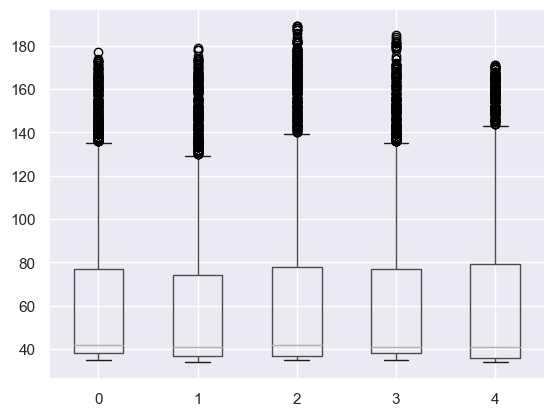

In [32]:
temp_df = pd.DataFrame(columns=range(5))
for i in range(5):
    temp_df[i] = dfs[i].delay

temp_df.boxplot()

<Axes: >

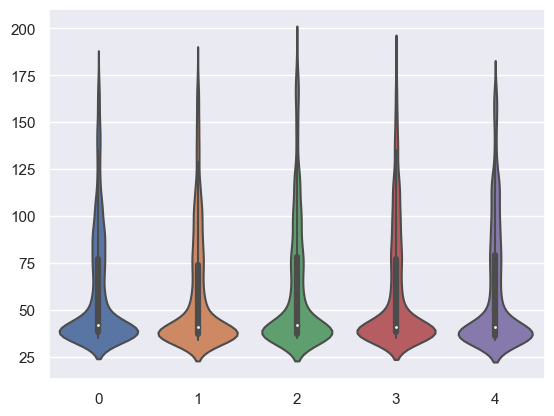

In [33]:
sns.violinplot(temp_df)

## Попробуем найти лучшее распределение, которое обясняет наши данные

Попробуем найти такие гамма-распределенмия, каждое из которых имеет наименьшую квадратичную оченку с заданным распделением задержек. Сделаем это с помощью библиотеки fitter. Можно не акцентироваться на гамма-распредление и попытаться найти лучшее распределение из 80 предлагаемых этой библиотекой, но пока ограничемся только гамма распредлением.
Подробон: [FITTER documentation](https://fitter.readthedocs.io/en/latest/)

In [14]:
print(get_distributions())

['_fit', 'alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss'

In [49]:
best_dist = []
for i, df in enumerate(dfs):
    f = Fitter(df.delay, distributions=["invgamma"])
    f.fit()
    best_dist.append(f.get_best(method='sumsquare_error')["invgamma"])
    print("Best gamma params: ", best_dist[i])
    print("*"*100)

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]


Best gamma params:  {'a': 0.7704894938566712, 'loc': 34.72780090335608, 'scale': 3.628574902561443}
****************************************************************************************************


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


Best gamma params:  {'a': 0.7776490051369367, 'loc': 33.8914290714222, 'scale': 3.516431828981392}
****************************************************************************************************


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


Best gamma params:  {'a': 0.7103062874693513, 'loc': 34.47737755114035, 'scale': 3.1809173357403617}
****************************************************************************************************


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


Best gamma params:  {'a': 0.7795544940478847, 'loc': 34.70270788869266, 'scale': 3.6441217956394043}
****************************************************************************************************


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

Best gamma params:  {'a': 0.7171658312152207, 'loc': 33.70985746947606, 'scale': 3.145543861056331}
****************************************************************************************************


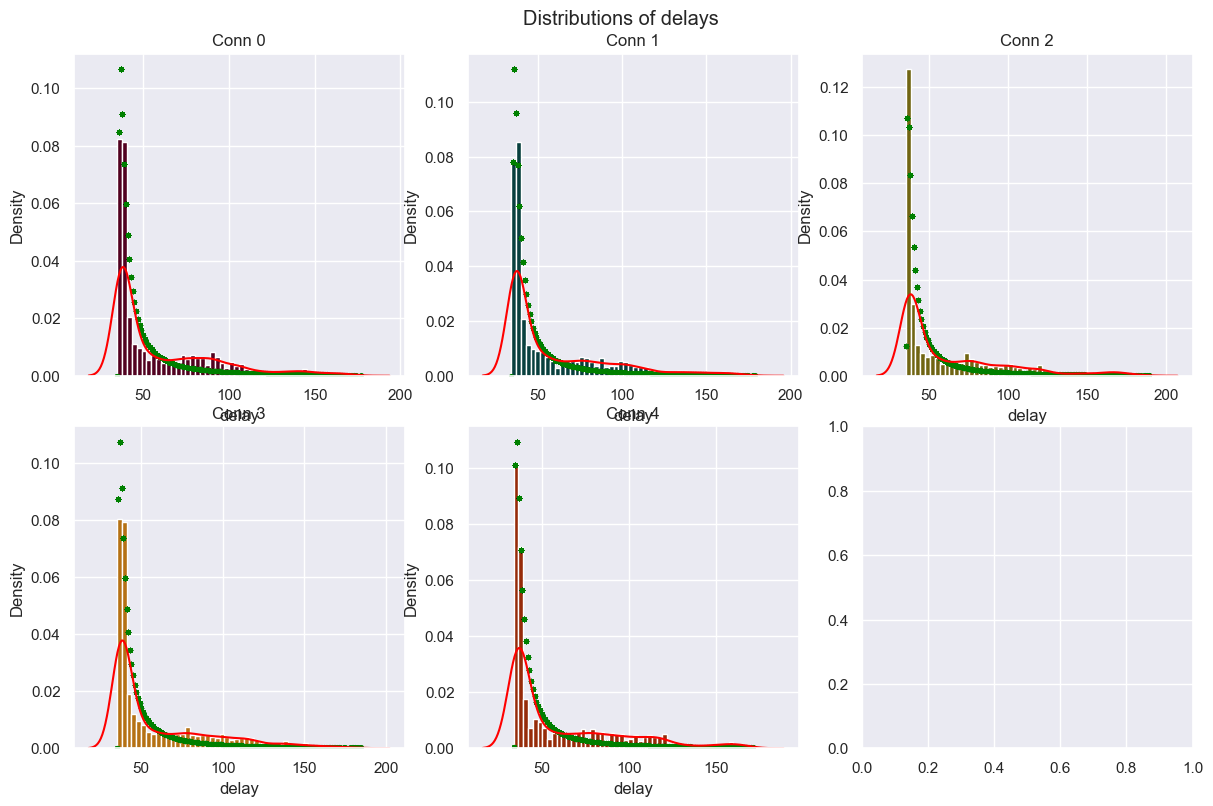

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Distributions of delays")
fig.tight_layout()
colors = ["#520120", "#08403E", "#706513", "#B57114", "#962B09"]

for (num, df), (i, j), color in zip(enumerate(dfs), itertools.product(range(2), range(3)), colors):
    sns.kdeplot(data=df.delay, ax=ax[i][j], c="red")
    pdf = invgamma.pdf(df.delay, a=best_dist[num]["a"], loc=best_dist[num]["loc"], scale=best_dist[num]["scale"])
    ax[i][j].hist(df.delay, bins=50, color=color, density=True)
    ax[i][j].scatter(df.delay, pdf, s=7, c="green")
    ax[i][j].set_title(f"Conn {num}")

## Mann–Whitney U Test

А теперь попробуем сравнить два распределения. К сожаления, в таком виде сравнивать средние этих распределений не совсем корректно, так как все они распределены далеко не по Стьюденту (T-test). Кроме того, простые изменения, как взятье логарифма, не особо помогают, так как
у нас сильный перевес в сторону маленьких значений задержки.
</br>
Поэтому попробуем использовать не параметричесий метод [U-критерий Манна — Уитн](https://ru.wikipedia.org/wiki/U-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%B8%D1%82%D0%BD%D0%B8). После мы увидим, что p-value у всех пар близкий к 1, т.е. мы **не** отвергаем нулевую гипотезу о том, что распределение одинаково у этих пар.

In [23]:
for i, j in itertools.product(range(5), range(5)):
    stat, p_value = mannwhitneyu(dfs[i], dfs[j])
    print(f" Mann–Whitney U Test for conn {i} and conns {j} pair: statistic={stat}, p-value={p_value}")

 Mann–Whitney U Test for conn 0 and conns 0 pair: statistic=[16125520.5 16125520.5 16125520.5], p-value=[1. 1. 1.]
 Mann–Whitney U Test for conn 0 and conns 1 pair: statistic=[16125520.5 16133380.5 18104200. ], p-value=[9.87037830e-01 9.77082069e-01 7.27689016e-30]
 Mann–Whitney U Test for conn 0 and conns 2 pair: statistic=[16125520.5 16116835.  16533943. ], p-value=[0.98703783 0.9474178  0.01975964]
 Mann–Whitney U Test for conn 0 and conns 3 pair: statistic=[16125520.5 16125487.  16232956. ], p-value=[0.98703783 0.98688489 0.54745909]
 Mann–Whitney U Test for conn 0 and conns 4 pair: statistic=[16125520.5 16120248.  18100982.5], p-value=[9.87037830e-01 9.62976570e-01 9.68286503e-30]
 Mann–Whitney U Test for conn 1 and conns 0 pair: statistic=[16131199.5 16123339.5 14152520. ], p-value=[9.87037830e-01 9.77082069e-01 7.27689016e-30]
 Mann–Whitney U Test for conn 1 and conns 1 pair: statistic=[16131200. 16131200. 16131200.], p-value=[1. 1. 1.]
 Mann–Whitney U Test for conn 1 and conns 

## Kolmogorov-Smirnov test

Значение p ниже 5%, поэтому мы отвергаем нулевую гипотезу о том, что два распределения одинаковы, с достоверностью 95%. Но надо учитывать, что тест Колмогорова-Смирнова слишком консервативен и слишком редко отвергает нулевую гипотезу.

In [27]:
for i, j in itertools.product(range(5), range(5)):
    stat, p_value = kstest(dfs[i].delay, dfs[j].delay)
    print(f" Kolmogorov-Smirnov Test for {(i, j)} pair: statistic={stat:.4f}, p-value={p_value:.4f}")

 Kolmogorov-Smirnov Test for (0, 0) pair: statistic=0.0000, p-value=1.0000
 Kolmogorov-Smirnov Test for (0, 1) pair: statistic=0.1729, p-value=0.0000
 Kolmogorov-Smirnov Test for (0, 2) pair: statistic=0.0658, p-value=0.0000
 Kolmogorov-Smirnov Test for (0, 3) pair: statistic=0.0257, p-value=0.0457
 Kolmogorov-Smirnov Test for (0, 4) pair: statistic=0.2252, p-value=0.0000
 Kolmogorov-Smirnov Test for (1, 0) pair: statistic=0.1729, p-value=0.0000
 Kolmogorov-Smirnov Test for (1, 1) pair: statistic=0.0000, p-value=1.0000
 Kolmogorov-Smirnov Test for (1, 2) pair: statistic=0.1102, p-value=0.0000
 Kolmogorov-Smirnov Test for (1, 3) pair: statistic=0.1764, p-value=0.0000
 Kolmogorov-Smirnov Test for (1, 4) pair: statistic=0.0523, p-value=0.0000
 Kolmogorov-Smirnov Test for (2, 0) pair: statistic=0.0658, p-value=0.0000
 Kolmogorov-Smirnov Test for (2, 1) pair: statistic=0.1102, p-value=0.0000
 Kolmogorov-Smirnov Test for (2, 2) pair: statistic=0.0000, p-value=1.0000
 Kolmogorov-Smirnov Test 

## Chi-squared test

In [8]:
result = []

for (i, j) in itertools.product(range(5), range(5)):
    df_bins = pd.DataFrame()
    _, bins = pd.qcut(dfs[i].delay, q=10, retbins=True, duplicates="drop")
    df_bins['bin'] = pd.cut(dfs[i].delay, bins=bins).value_counts().index
    df_bins['first_observed'] = pd.cut(dfs[i].delay, bins=bins).value_counts().values
    df_bins['second_observed'] = pd.cut(dfs[j].delay, bins=bins).value_counts().values
    df_bins['second_expected'] = df_bins['first_observed'] / np.sum(df_bins['first_observed']) * np.sum(df_bins['second_observed'])
    result.append(df_bins)

In [19]:
result[-2]

,bin,first_observed,second_observed,second_expected
0,"(34.0, 36.0]",1569,1492,1566.785462
1,"(36.0, 37.0]",715,1085,713.990826
2,"(37.0, 41.0]",600,642,599.153140
3,"(70.0, 89.0]",577,571,576.185603
4,"(89.0, 113.0]",571,561,570.194072
5,"(51.0, 70.0]",552,535,551.220889
6,"(113.0, 171.0]",550,492,549.223712
7,"(41.0, 51.0]",534,282,533.246295


In [20]:
for df_bins, (i, j) in zip(result, itertools.product(range(5), range(5))):
    stat, p_value = chisquare(df_bins['second_observed'], df_bins['second_expected'])
    print(f"Chi-squared Test for {(i, j)} pair: statistic={stat:.4f}, p-value={p_value:.4f}")

Chi-squared Test for (0, 0) pair: statistic=0.0000, p-value=1.0000
Chi-squared Test for (0, 1) pair: statistic=598.7794, p-value=0.0000
Chi-squared Test for (0, 2) pair: statistic=150.3624, p-value=0.0000
Chi-squared Test for (0, 3) pair: statistic=34.2033, p-value=0.0000
Chi-squared Test for (0, 4) pair: statistic=563.3499, p-value=0.0000
Chi-squared Test for (1, 0) pair: statistic=101.4647, p-value=0.0000
Chi-squared Test for (1, 1) pair: statistic=0.0000, p-value=1.0000
Chi-squared Test for (1, 2) pair: statistic=270.4863, p-value=0.0000
Chi-squared Test for (1, 3) pair: statistic=80.8208, p-value=0.0000
Chi-squared Test for (1, 4) pair: statistic=172.7331, p-value=0.0000
Chi-squared Test for (2, 0) pair: statistic=186.1749, p-value=0.0000
Chi-squared Test for (2, 1) pair: statistic=88.3375, p-value=0.0000
Chi-squared Test for (2, 2) pair: statistic=0.0000, p-value=1.0000
Chi-squared Test for (2, 3) pair: statistic=251.5227, p-value=0.0000
Chi-squared Test for (2, 4) pair: statistic

## Доли быстрых апдейтов по коннекшенам

In [76]:
for i in range(len(dfs)):
    dfs[i].set_index(dfs[i]["update_id"], inplace=True)
    dfs[i].drop(columns=["update_id"], inplace=True)
    dfs[i].columns = [column + f"_{i}" for column in dfs[i].columns]

dfs[0]

,client_timestamp_0,delay_0
update_id,,
2825184488692,1.683622e+12,37.0
2825184489037,1.683622e+12,36.0
2825184491689,1.683622e+12,37.0
2825184496708,1.683622e+12,37.0
2825184497016,1.683622e+12,38.0
...,...,...
2825186475263,1.683622e+12,38.0
2825186475553,1.683622e+12,37.0
2825186475620,1.683622e+12,38.0


In [85]:
import functools as ft
df_joined = ft.reduce(lambda left, right: pd.merge(left, right, on='update_id'), dfs)
df_joined.drop(columns=["delay_0", 'delay_1', 'delay_2', 'delay_3', 'delay_4'], inplace=True)

In [81]:
df_joined.shape

(5679, 10)

In [103]:
res = df_joined.idxmin(axis=1).value_counts()
res = res / res.sum()
res.name = "Share"
res

client_timestamp_1    0.448142
client_timestamp_4    0.217996
client_timestamp_0    0.135059
client_timestamp_3    0.116570
client_timestamp_2    0.082233
Name: Share, dtype: float64

## Проверим влияние GIL

In [119]:
def dummy_func(it, q):
    for i in range(3000):
        it.put(i)
        q.put(time.time())
        time.sleep(randint(30, 80) / 1000)

In [120]:
threads = list()
queues = [Queue() for _ in range(5)]
its = [Queue() for _ in range(5)]

for i in range(5):
    th = Thread(target=dummy_func, args=(its[i], queues[i]))
    threads.append(th)
    th.start()

for th in threads:
    th.join()

In [121]:
temp = pd.DataFrame()
for i in range(5):
    temp[f"thread_{i}"] = list(queues[i].queue)

temp_res = temp.idxmin(axis=1).value_counts()
temp_res = temp_res / temp_res.sum()
temp_res.name = "Share"
temp_res

thread_1    0.893667
thread_2    0.100667
thread_0    0.005667
Name: Share, dtype: float64

## Вывод


Как мы видим таже такой простой вариант, когда мы засыпаем на рандомное время из равномерного распределения с диапазона [30, 80], показывает похожую картину. Использование время засыпания из гамма распределения или даже константную тоже не поменяли результат. Дело в том, что python управляет потоками довольно примитивно, нет балансировщика задач, и первое обновление всегда будет получать первый тред, если он успел закончить предыдущую `I/O` операцию после получения управления последнего потока из списка ожидающих.

Этот и эксперимент с использованием 200 потоков, показывают, что GIL имеет сильное влияние на результирующие распределения. Чтобы более точно и количественно оценить это влияние, нужно проводить более аккуратные исследования. Плюс не надо отбрасывать фактор использование библиотеки `websocket-client`, так как сами разработчики предупреждают, что она не особо умеет работать асинхронно (я об этом узнал, после того как написал код). Т.е. желательно использовать уже готовые реализации как (`python-binance`) или использовать корутины в паре с более низкоурвневыми библиотеками.

По статистическим тестам все получилось довольно-таки не однозначно, так как некоторые тесты как Mann–Whitney U Test не отвергали нулевую гипотезу о сходстве распределений, а другие как тест Колмогорова-Смирнова очень уверено отвергали.

*Итог, нужно повторить исследование с использовнием корутин, либо более глубоко изучать причины несоответствия разных не параметрических тестов.*